--- Naive Bayes Classification ---
Naive Bayes Accuracy: 0.6146


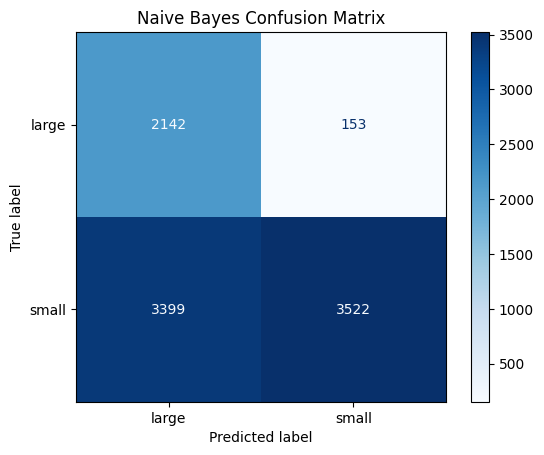


--- KNN Classification ---
KNN Accuracy: 0.8276


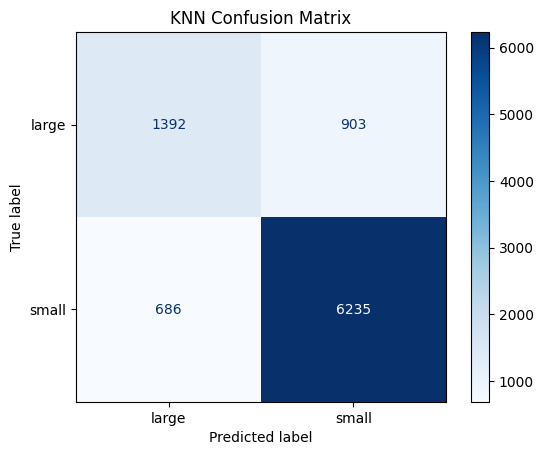


--- Model Comparison ---
KNN is more accurate with an accuracy of 0.8276.
Naive Bayes had an accuracy of 0.6146.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('AdultUCI.csv')

# --- Data Preprocessing ---

# Drop the 'fnlwgt' column as it's not relevant for classification
df = df.drop('fnlwgt', axis=1)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove categorical variables with more than 32 levels
for col in categorical_cols:
    if df[col].nunique() > 32:
        df = df.drop(col, axis=1)

# Handle missing values represented by ' ?'
df = df.replace(' ?', pd.NA).dropna()

# Identify categorical and numerical columns after dropping columns and rows
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64']).columns.tolist()

# Drop the target variable from the features list
categorical_cols.remove('income')

# Prepare the data for modeling
X = df.drop('income', axis=1)
y = df['income']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y) # 0 for 'small' (<=50K), 1 for 'big' (>50K)
class_names = le.classes_

# Create a preprocessor for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Apply preprocessing to training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# --- Naive Bayes Model ---

print("--- Naive Bayes Classification ---")
gnb = GaussianNB()
gnb.fit(X_train_processed.toarray(), y_train)
y_pred_gnb = gnb.predict(X_test_processed.toarray())
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Naive Bayes Accuracy: {accuracy_gnb:.4f}")

# Calculate and display the confusion matrix for Naive Bayes
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb, display_labels=class_names)
disp_gnb.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# --- K-Nearest Neighbors (KNN) Model ---

print("\n--- KNN Classification ---")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_processed, y_train)
y_pred_knn = knn.predict(X_test_processed)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")

# Calculate and display the confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=class_names)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix")
plt.show()

# --- Model Comparison ---

print("\n--- Model Comparison ---")
if accuracy_knn > accuracy_gnb:
    print(f"KNN is more accurate with an accuracy of {accuracy_knn:.4f}.")
    print(f"Naive Bayes had an accuracy of {accuracy_gnb:.4f}.")
elif accuracy_gnb > accuracy_knn:
    print(f"Naive Bayes is more accurate with an accuracy of {accuracy_gnb:.4f}.")
    print(f"KNN had an accuracy of {accuracy_knn:.4f}.")
else:
    print(f"Both models have the same accuracy: {accuracy_knn:.4f}.")